In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ventricle = pd.read_csv("Ventricle_processed.csv", index_col=0)
article = pd.read_csv("Atrial_processed.csv", index_col=0)



## use cv index function

In [84]:
# get relevant data
ventricle_data = ventricle.iloc[:,2:]
article_data = article.iloc[:,2:]

In [65]:
# convert it to numpy array (number of cells * 4500)
vnp = ventricle_data.values
anp = article_data.values

In [86]:
# conduct fourier transform to both data
vfft = np.fft.fft(vnp, axis=1)
vpwr = np.abs(vfft) ** 2

afft = np.fft.fft(anp, axis=1)
apwr = np.abs(afft) ** 2
# get first half of spectrum
vpwr = vpwr[:, :int(vpwr.shape[1] / 2)]
apwr = apwr[:, :int(apwr.shape[1] / 2)]

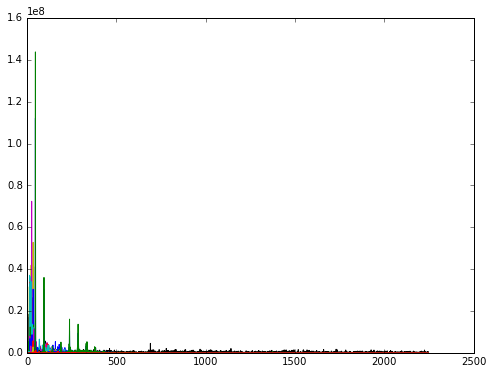

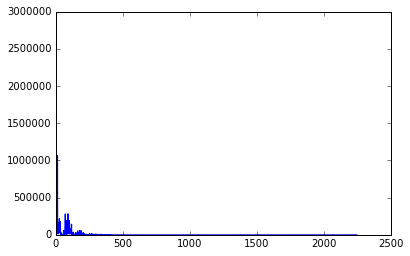

In [91]:
# plot some figures
plt.figure(figsize=(8,6))
for i in range(vpwr.shape[0]):
    plt.plot(vpwr[i][2:])
for i in range(apwr.shape[0]):
    plt.plot(apwr[i][2:])
plt.show()
plt.plot(vpwr[99])

In [94]:
np.save("ventricle_spectrum.npy", vpwr)
np.save("article_spectrum.npy", apwr)